In [1]:
import json
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = 'lightgrey'

2021-11-11 20:02:18.374918: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-11 20:02:18.374956: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

Bad key "text.kerning_factor" on line 4 in
/home/atlas/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
DATASET_PATH = "Data/data_10.json"

In [22]:
def load_data(dataset_path):
    with open(dataset_path, "r") as fp: # open for reading
        data = json.load(fp)
        
    # convert lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs, targets

def plot_history(history):
    fig, axs = plt.subplots(2, figsize=(10,10))
    
    # create accuracy subplot
    axs[0].plot(history.history['accuracy'], label='Train Accuracy')        
    axs[0].plot(history.history['val_accuracy'], label='Test Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend(loc='lower right')
    axs[0].set_title('Accuracy Evaluation')
    
    # create error subplot
    axs[1].plot(history.history['loss'], label='Train Error')        
    axs[1].plot(history.history['val_loss'], label='Test Error')
    axs[1].set_ylabel('Error')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(loc='upper right')
    axs[1].set_title('Error Evaluation')
    
    plt.show()

# load the dataset
if __name__ == "__main__":
    inputs, targets = load_data(dataset_path=DATASET_PATH)

In [4]:
inputs.shape

(9896, 130, 13)

In [5]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2)

In [28]:
# build the network architecture
model = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])), # inputs is 3D array, so shape[1] represents the individual segments. 
    
    # 1st hidden layer
    # Rectified Linear Unit, funct of h, which is the net input. ReLU provides better convergence by reducing likelihood of vanishing gradient
    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu"), 
    keras.layers.Dropout(0.3),
    
    # 2nd hidden layer
    keras.layers.Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu"),
    keras.layers.Dropout(0.3),
    
    # 3rd hidden layer
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu"),
    keras.layers.Dropout(0.3),
    
    # output layer
    keras.layers.Dense(10, activation="softmax") # 10 because there are 10 genres. 
])

In [29]:
# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [30]:
model.summary
# train network
genre_model = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=400,
          batch_size=32
         )

Epoch 1/400
248/248 [==============================] - 3s 12ms/step - loss: 22.6379 - accuracy: 0.1541 - val_loss: 3.6772 - val_accuracy: 0.1697
Epoch 2/400
248/248 [==============================] - 3s 12ms/step - loss: 6.0498 - accuracy: 0.1564 - val_loss: 3.5144 - val_accuracy: 0.1116
Epoch 3/400
248/248 [==============================] - 4s 14ms/step - loss: 4.2516 - accuracy: 0.1220 - val_loss: 3.4813 - val_accuracy: 0.1182
Epoch 4/400
248/248 [==============================] - 3s 11ms/step - loss: 3.8217 - accuracy: 0.1311 - val_loss: 3.4677 - val_accuracy: 0.1207
Epoch 5/400
248/248 [==============================] - 3s 11ms/step - loss: 3.6291 - accuracy: 0.1400 - val_loss: 3.4411 - val_accuracy: 0.1449
Epoch 6/400
248/248 [==============================] - 3s 11ms/step - loss: 3.5715 - accuracy: 0.1525 - val_loss: 3.3947 - val_accuracy: 0.1707
Epoch 7/400
248/248 [==============================] - 3s 12ms/step - loss: 3.4953 - accuracy: 0.1669 - val_loss: 3.3729 - val_accuracy

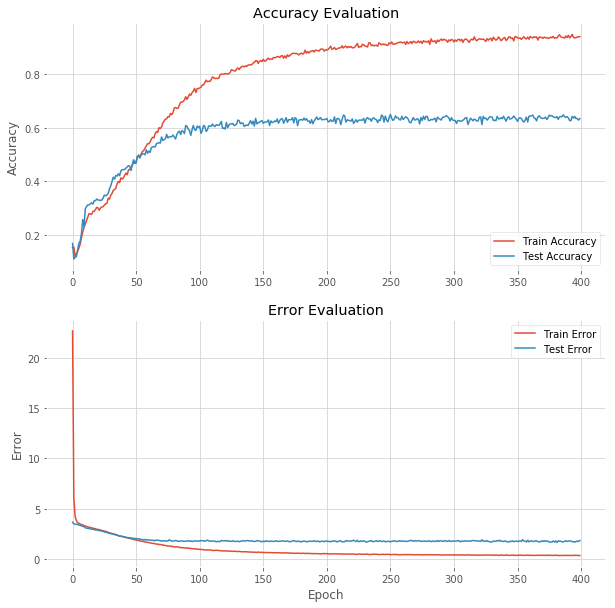

In [32]:
plot_history(genre_model)

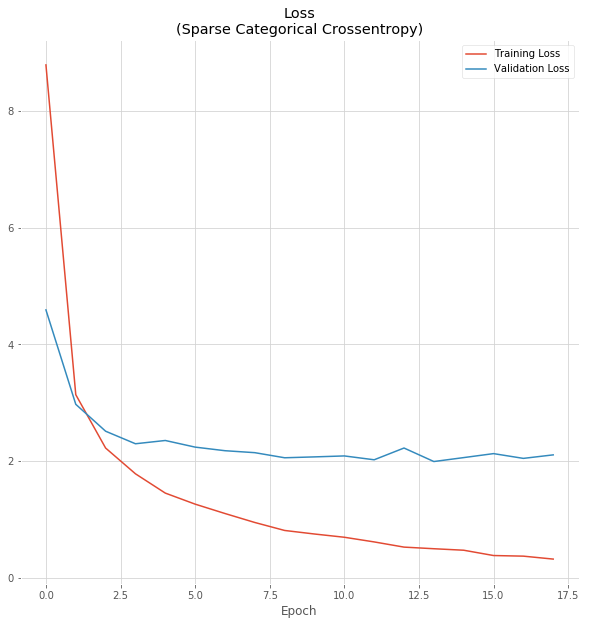

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(genre_model.epoch, metrics['loss'], metrics['val_loss'])

plt.title('Loss\n(Sparse Categorical Crossentropy)')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
# ax.set_ylim(0.0,0.4)
plt.show()